In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

def init_adam_states(feature_dims):
    v_w, v_b = torch.zeros((feature_dims, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dims, 1)), torch.zeros((1, ))
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = .9, .999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * p.grad ** 2
            v_t = v / (1 - beta1 ** hyperparams["t"])
            s_t = s / (1 - beta2 ** hyperparams["t"])
            g = hyperparams["lr"] * v_t / (torch.sqrt(s_t) + eps)
            p[:] -= g
        p.grad.data.zero_()
    hyperparams["t"] += 1

loss: 0.245, 0.018 sec/epoch


([0.020987749099731445,
  0.05196976661682129,
  0.06797575950622559,
  0.08396387100219727,
  0.10195517539978027,
  0.11795639991760254,
  0.13594579696655273,
  0.15195059776306152,
  0.16794061660766602,
  0.1839308738708496,
  0.1999197006225586,
  0.21592402458190918,
  0.23191308975219727,
  0.24790358543395996,
  0.2629096508026123],
 [0.3829233912229538,
  0.29996932425101597,
  0.2661947698990504,
  0.2514345046679179,
  0.25150000357627866,
  0.24646753450234732,
  0.2436798067142566,
  0.24387002899249394,
  0.24323795390129088,
  0.24384121888875962,
  0.2425677198867003,
  0.24429872886339823,
  0.24682444707552592,
  0.24310062352816264,
  0.2451156133611997])

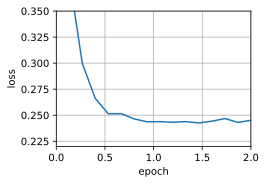

In [2]:
data_iter, feature_dims = d2l.get_data_ch11(10)
d2l.train_ch11(adam, init_adam_states(feature_dims), {'lr':.01, 't':1}, data_iter, feature_dims)

loss: 0.243, 0.014 sec/epoch


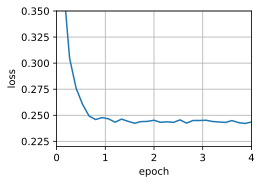

In [5]:
trainer = torch.optim.Adam
d2l.train_concise_ch11(trainer, {'lr':.01}, data_iter)

loss: 0.244, 0.018 sec/epoch


([0.01998734474182129,
  0.03699016571044922,
  0.05498003959655762,
  0.0709683895111084,
  0.08897018432617188,
  0.10497641563415527,
  0.119964599609375,
  0.13895273208618164,
  0.15893959999084473,
  0.17992711067199707,
  0.19792842864990234,
  0.21691370010375977,
  0.2339167594909668,
  0.25191783905029297,
  0.2689061164855957],
 [0.36069982043902077,
  0.28976270643870033,
  0.26220823379357655,
  0.24927068511644998,
  0.2485528573989868,
  0.24603919331232707,
  0.2445333020289739,
  0.24394737086693447,
  0.2434724110464255,
  0.24303560821215311,
  0.24284480051199595,
  0.24445333139101663,
  0.24248785599072775,
  0.2436712179382642,
  0.24353002669413884])

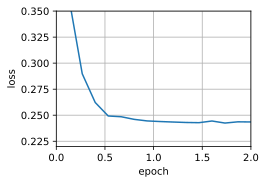

In [6]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = .9, .999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * p.grad ** 2 * torch.sign(p.grad ** 2 - s)
            v_t = v / (1 - beta1 ** hyperparams['t'])
            s_t = s / (1 - beta2 ** hyperparams['t'])
            g = hyperparams['lr'] * v_t / (torch.sqrt(s_t) + eps)
            p -= g
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dims = d2l.get_data_ch11(10)
d2l.train_ch11(yogi, init_adam_states(feature_dims), {'lr':.01, 't':1}, data_iter, feature_dims)